<a href="https://colab.research.google.com/github/Vahe0795/Machine-Learning/blob/main/NLP_with_Convolutional_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Train_rev1.csv", index_col=None)
print(data.shape)
data.head()

(244768, 12)


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [ ]:
data.drop(['Id'], axis=1, inplace=True)

In [ ]:
data.shape

(244768, 11)

In [ ]:
print("Raw text:")
print(data["FullDescription"][2::100000])

Raw text:
2         Mathematical Modeller / Simulation Analyst / O...
100002    A successful and high achieving specialist sch...
200002    Web Designer  HTML, CSS, JavaScript, Photoshop...
Name: FullDescription, dtype: object


In [ ]:
data.Title[1588]

nan

In [ ]:
import nltk
tokenizer = nltk.tokenize.WordPunctTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))
data["Title"] = [preprocess(i) for i in data['Title'].apply(str)]
data["FullDescription"] = [preprocess(i) for i in data['FullDescription']]

In [ ]:
print("Tokenized:")
print(data["FullDescription"][2::100000])
assert data["FullDescription"][2][:50] == 'mathematical modeller / simulation analyst / opera'
assert data["Title"][54321] == 'international digital account manager ( german )'

Tokenized:
2         mathematical modeller / simulation analyst / o...
100002    a successful and high achieving specialist sch...
200002    web designer html , css , javascript , photosh...
Name: FullDescription, dtype: object


In [ ]:
data.to_csv('data_tokenized.csv', index=False)
data = pd.read_csv('data_tokenized.csv')
data.sample(3)

,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
35312,treasury dealer,robert half is currently recruiting for a trea...,Bristol,Bristol,full_time,NaN,NaN,Accounting & Finance Jobs,"20,000.00 - 25,000.00 per year",22500,Jobcentre Plus
118770,web business analyst,"our client , a heritage brand is looking for a...",London South East,South East London,NaN,permanent,FASHION & RETAIL PERSONNEL LIMITED,Retail Jobs,40000 - 45000 per annum + benefits,42500,retailchoice.com
94095,javascript developer ( html5 ) london,javascript developer ( html5 ) ? london ? cont...,UK,UK,full_time,permanent,Monarch Recruitment,IT Jobs,"From 15,000 to 15,000 per year",15000,fish4.co.uk


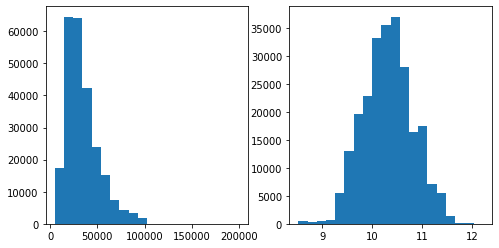

In [ ]:
data['Log1pSalary'] = np.log1p(data['SalaryNormalized']).astype('float32')

plt.figure(figsize=[8, 4])
plt.subplot(1, 2, 1)
plt.hist(data["SalaryNormalized"], bins=20);

plt.subplot(1, 2, 2)
plt.hist(data['Log1pSalary'], bins=20);

In [ ]:
text_columns = ["Title", "FullDescription"]
categorical_columns = ["Category", "Company", "LocationNormalized", "ContractType", "ContractTime"]
target_column = "Log1pSalary"

data[categorical_columns] = data[categorical_columns].fillna('NaN') # cast missing values to string "NaN"
data[text_columns] = data[text_columns].fillna('NaN') # cast missing values to string "NaN"

data.sample(3)

,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,Log1pSalary
228759,engineering manager,have you got experience in a fmcg manufacturin...,West Midlands,West Midlands,NaN,permanent,SJS Consulting,Engineering Jobs,"From 40,000 to 50,000 per annum Plus benefits",45000,totaljobs.com,10.714440
213203,senior scoring analyst,job title : senior scoring analyst location : ...,Leeds West Yorkshire Yorkshire,Leeds,NaN,permanent,Aspire Data Recruitment,Accounting & Finance Jobs,38000,38000,totaljobs.com,10.545368
91054,trainer,we are looking to recruit an experienced train...,Greater Manchester North West,Greater Manchester,NaN,permanent,Daniel Adams,Consultancy Jobs,"From 25,000 to 30,000 per annum",27500,totaljobs.com,10.221977


In [ ]:
from collections import Counter
text = [''.join(j) for i in data[text_columns].iloc[:, 0] for j in i.split()]
text_1 = [''.join(j) for i in data[text_columns].iloc[:, 1] for j in i.split()]
text_2 = text + text_1 
token_counts = Counter(''.join(j) for i in text_2 for j in i.split())

In [ ]:
print("Total unique tokens :", len(token_counts))
print('\n'.join(map(str, token_counts.most_common(n=5))))
print('...')
print('\n'.join(map(str, token_counts.most_common()[-3:])))

assert token_counts.most_common(1)[0][1] in range(2600000, 2700000)
assert len(token_counts) in range(200000, 210000)
print('Correct!')

Total unique tokens : 202705
('and', 2657388)
('.', 2523216)
(',', 2318606)
('the', 2080994)
('to', 2019884)
...
('stephanietraveltraderecruitmnt', 1)
('ruabon', 1)
('lowehays', 1)
Correct!


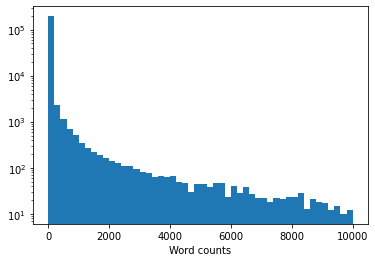

In [ ]:
plt.hist(list(token_counts.values()), range=[0, 10**4], bins=50, log=True)
plt.xlabel("Word counts");

In [ ]:
{item: value for item, value in sorted(token_counts.items(), key = lambda item: item[1], reverse=True)}

{'and': 2657388,
 '.': 2523216,
 ',': 2318606,
 'the': 2080994,
 'to': 2019884,
 'a': 1521925,
 'of': 1426213,
 'in': 1035792,
 'for': 867233,
 'with': 728884,
 'you': 694177,
 '****': 681869,
 'will': 652403,
 'be': 625163,
 'is': 599665,
 '/': 554003,
 'this': 497002,
 'as': 472859,
 'an': 442713,
 'experience': 429019,
 'are': 428534,
 ':': 415648,
 'on': 394777,
 'have': 361514,
 'or': 329512,
 'role': 292680,
 'work': 280280,
 'business': 275975,
 'your': 275371,
 'team': 271843,
 'we': 238825,
 'skills': 236248,
 'manager': 235225,
 '(': 234419,
 'sales': 229086,
 'our': 223441,
 'working': 222783,
 'within': 217418,
 'all': 216046,
 'that': 200655,
 'client': 198691,
 'management': 190344,
 ')': 185958,
 'their': 185011,
 'company': 177583,
 'at': 171875,
 'please': 171870,
 'development': 168938,
 'uk': 163958,
 'from': 162263,
 'support': 161650,
 'job': 156315,
 'looking': 155766,
 's': 151120,
 'service': 145467,
 'excellent': 144946,
 'required': 137902,
 'opportunity': 131

In [ ]:
min_count = 10
tokens = [keys for keys in token_counts.keys() if token_counts[keys] >= min_count]

In [ ]:
UNK, PAD = "UNK", "PAD"
tokens.append(UNK)
tokens.append(PAD)
print("Vocabulary size:", len(tokens))

assert type(tokens) == list
assert len(tokens) in range(32000, 35000)
assert 'me' in tokens
assert UNK in tokens
print("Correct!")

Vocabulary size: 34158
Correct!


In [ ]:
token_to_id = dict()
for i, token in enumerate(tokens):
    token_to_id[token] = i

In [ ]:
assert isinstance(token_to_id, dict)
assert len(token_to_id) == len(tokens)
for tok in tokens:
    assert tokens[token_to_id[tok]] == tok

print("Correct!")

Correct!


In [ ]:
UNK_IX, PAD_IX = map(token_to_id.get, [UNK, PAD])

def as_matrix(sequences, max_len=None):
    if isinstance(sequences[0], str):
        sequences = list(map(str.split, sequences))
        
    max_len = min(max(map(len, sequences)), max_len or float('inf'))
    
    matrix = np.full((len(sequences), max_len), np.int32(PAD_IX))
    for i,seq in enumerate(sequences):
        row_ix = [token_to_id.get(word, UNK_IX) for word in seq[:max_len]]
        matrix[i, :len(row_ix)] = row_ix
    
    return matrix

In [ ]:
print("Lines:")
print('\n'.join(data["Title"][::100000].values), end='\n\n')
print("Matrix:")
print(as_matrix(data["Title"][::100000]))

Lines:
engineering systems analyst
hr assistant
senior ec & i engineer

Matrix:
[[    0     1     2 34157 34157]
 [  996   174 34157 34157 34157]
 [   16  3469   240    57     4]]


In [ ]:
from sklearn.feature_extraction import DictVectorizer

top_companies, top_counts = zip(*Counter(data['Company']).most_common(1000))
recognized_companies = set(top_companies)
data["Company"] = data["Company"].apply(lambda comp: comp if comp in recognized_companies else "Other")

categorical_vectorizer = DictVectorizer(dtype=np.float32, sparse=False)
categorical_vectorizer.fit(data[categorical_columns].apply(dict, axis=1))

DictVectorizer(dtype=<class 'numpy.float32'>, sparse=False)

In [ ]:
data.drop(['LocationRaw', 'SalaryRaw', 'SalaryNormalized', 'SourceName'], axis=1, inplace=True)
data.columns

Index(['Title', 'FullDescription', 'LocationNormalized', 'ContractType',
       'ContractTime', 'Company', 'Category', 'Log1pSalary'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(data, test_size=0.2, random_state=42)
data_train.index = range(len(data_train))
data_val.index = range(len(data_val))

print("Train size = ", len(data_train))
print("Validation size = ", len(data_val))

Train size =  195814
Validation size =  48954


In [ ]:
data_train

,Title,FullDescription,LocationNormalized,ContractType,ContractTime,Company,Category,Log1pSalary
0,senior support worker,senior support worker wanted a senior support ...,Taunton,NaN,permanent,Other,Healthcare & Nursing Jobs,9.711540
1,statistical / mathematical modeller in pharmac...,statistical / mathematical modeller in pharmac...,North West London,NaN,permanent,Other,Scientific & QA Jobs,10.463132
2,emc team leader ( def stan ),the opportunity my client is currently seeking...,Surrey,NaN,permanent,Other,Engineering Jobs,10.714440
3,"core java engineer london , big data","core java engineer london , big data , mysql ,...",London,NaN,permanent,Engage PSG,IT Jobs,11.042938
4,driver,"**** driver reqd for busy parcel round , exper...",Brentwood,full_time,NaN,Other,Logistics & Warehouse Jobs,9.798182
...,...,...,...,...,...,...,...,...
195809,senior solutions architect,a senior solutions architect is required to jo...,London,NaN,permanent,NaN,IT Jobs,11.277216
195810,charity administrator,job title : charity administrator salary : pou...,The City,NaN,permanent,Other,Social work Jobs,9.852247
195811,senior consumer insight manager communications...,about the role the senior consumer insight man...,Central London,NaN,NaN,NaN,"PR, Advertising & Marketing Jobs",10.859018
195812,"customer service manager , guildford , motor t...","automotive , motor trade job : customer servic...",Guildford,NaN,NaN,Perfect Placement,Trade & Construction Jobs,10.308986


In [ ]:
def make_batch(data, max_len=None, word_dropout=0):
  
    batch = {}
    batch["Title"] = as_matrix(data["Title"].values, max_len)
    batch["FullDescription"] = as_matrix(data["FullDescription"].values, max_len)
    batch['Categorical'] = categorical_vectorizer.transform(data[categorical_columns].apply(dict, axis=1))
    
    if word_dropout != 0:
        batch["FullDescription"] = apply_word_dropout(batch["FullDescription"], 1. - word_dropout)
    
    if target_column in data.columns:
        batch[target_column] = data[target_column].values
    
    return batch

def apply_word_dropout(matrix, keep_prop, replace_with=UNK_IX, pad_ix=PAD_IX,):
    dropout_mask = np.random.choice(2, np.shape(matrix), p=[keep_prop, 1 - keep_prop])
    dropout_mask &= matrix != pad_ix
    return np.choose(dropout_mask, [matrix, np.full_like(matrix, replace_with)])

In [ ]:
make_batch(data_train[:3], max_len=10)

{'Title': array([[   16,   285,   357, 34157, 34157, 34157, 34157],
        [ 2860,     9,    10,    11,    53,    35, 12106],
        [ 2830,   616,   856,    61,  7101,  7102,    62]], dtype=int32),
 'FullDescription': array([[   16,   285,   357,  1405,   559,    16,   285,   357,  1461,
          1405],
        [ 2860,     9,    10,    11,    53,    35, 12106,  1764,  1163,
            72],
        [  140,  1614,  8827,  1311,  1461,   557,   558,   559,   616,
           856]], dtype=int32),
 'Categorical': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'Log1pSalary': array([ 9.71154 , 10.463132, 10.71444 ], dtype=float32)}

In [ ]:
make_batch(data_train[:105], max_len=10)['Title'].shape

(105, 10)

In [ ]:
make_batch(data_train[:15], max_len=10)['Categorical'].shape

(15, 3768)

In [ ]:
make_batch(data_train[:15], max_len=10)['Log1pSalary'].shape

(15,)

In [ ]:
import keras
import keras.layers as L

In [ ]:
keras.backend.clear_session()

In [ ]:
from keras.layers import Dense
import tensorflow as tf
from keras.models import Sequential

def build_model(n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=64):
    
    l_title = L.Input(shape=[10], name="Title")
    l_descr = L.Input(shape=[10], name="FullDescription")
    l_categ = L.Input(shape=[n_cat_features], name="Categorical")

    title = L.Embedding(input_dim = n_tokens, output_dim = 10)(l_title)
    title = keras.backend.expand_dims(title)
    title = L.Conv2D(filters=16, padding='valid', kernel_size = 2, activation='relu')(title)
    title = L.Conv2D(filters=16, padding='valid', kernel_size = 2, activation='relu')(title)
    title = L.MaxPooling2D()(title)
    title = L.Conv2D(filters=32, padding='valid', kernel_size = 2, activation='relu')(title)
    title = L.Conv2D(filters=64, padding='valid', kernel_size = 2, activation='relu')(title)
    title = L.MaxPooling2D()(title)
    title = L.Flatten()(title)

    descr = L.Embedding(input_dim=n_tokens, output_dim=10)(l_descr)
    descr = keras.backend.expand_dims(descr)
    descr = L.Conv2D(filters=16, padding='valid', kernel_size=2, activation='relu')(descr)
    descr = L.Conv2D(filters=16, padding='valid', kernel_size=2, activation='relu')(descr)
    descr = L.MaxPooling2D()(descr)
    descr = L.Conv2D(filters=32, padding='valid', kernel_size=2, activation='relu')(descr)
    descr = L.Conv2D(filters=64, padding='valid', kernel_size=2, activation='relu')(descr)
    descr = L.MaxPooling2D()(descr)
    descr = L.Flatten()(descr)

    categ = L.Dense(units=256, activation='relu')(l_categ)
    categ = L.Dense(units=128, activation='relu')(categ)
    categ = L.Dense(units=64, activation='relu')(categ)

    hidden = L.Concatenate()([categ, descr, title])
    hidden = L.Dense(512, activation='relu')(hidden)

    output_layer = Dense(1)(hidden)
    model = keras.models.Model(inputs=[l_title, l_descr, l_categ], outputs=output_layer)
    model.compile('adam', 'mean_squared_error', metrics=['mean_absolute_error'])
    return model
    

In [ ]:
get_model = build_model()
get_model.summary()

dummy_pred = get_model.predict(make_batch(data_train[:100], max_len=10))
dummy_loss = get_model.train_on_batch(make_batch(data_train[:100], max_len=10), data_train['Log1pSalary'][:100])[0]
assert dummy_pred.shape == (100, 1)
assert len(np.unique(dummy_pred)) > 20
assert np.ndim(dummy_loss) == 0 and 0. <= dummy_loss <= 250.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 FullDescription (InputLayer)   [(None, 10)]         0           []                               
                                                                                                  
 Title (InputLayer)             [(None, 10)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 10, 10)       341580      ['FullDescription[0][0]']        
                                                                                                  
 embedding (Embedding)          (None, 10, 10)       341580      ['Title[0][0]']                  
                                                                                              

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['Log1pSalary'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


In [ ]:
def iterate_minibatches(data, batch_size=256, shuffle=True, cycle=False, **kwargs):

    while True:
        indices = np.arange(len(data))
        if shuffle:
            indices = np.random.permutation(indices)

        for start in range(0, len(indices), batch_size):
            batch = make_batch(data.iloc[indices[start : start + batch_size]], **kwargs)
            target = batch.pop(target_column)
            yield batch, target
        
        if not cycle: break

In [ ]:
batch_size = 256
epochs = 25           
steps_per_epoch = (len(data_train) - 1) // batch_size + 1

model = build_model()

model.fit(iterate_minibatches(data_train, batch_size, cycle=True, word_dropout=0.05, max_len=10), 
                    epochs=epochs, steps_per_epoch=steps_per_epoch,
                    
                    validation_data=iterate_minibatches(data_val, batch_size, cycle=True, max_len=10),
                    validation_steps=data_val.shape[0] // batch_size)

Epoch 1/25
765/765 [==============================] - 27s 31ms/step - loss: 1.9681 - mean_absolute_error: 0.5163 - val_loss: 0.0904 - val_mean_absolute_error: 0.2250
Epoch 2/25
765/765 [==============================] - 25s 33ms/step - loss: 0.0822 - mean_absolute_error: 0.2139 - val_loss: 0.0835 - val_mean_absolute_error: 0.2154
Epoch 3/25
765/765 [==============================] - 24s 31ms/step - loss: 0.0695 - mean_absolute_error: 0.1963 - val_loss: 0.0750 - val_mean_absolute_error: 0.2026
Epoch 4/25
765/765 [==============================] - 25s 33ms/step - loss: 0.0646 - mean_absolute_error: 0.1898 - val_loss: 0.0732 - val_mean_absolute_error: 0.1997
Epoch 5/25
765/765 [==============================] - 26s 34ms/step - loss: 0.0577 - mean_absolute_error: 0.1782 - val_loss: 0.0714 - val_mean_absolute_error: 0.1970
Epoch 6/25
765/765 [==============================] - 24s 32ms/step - loss: 0.0537 - mean_absolute_error: 0.1723 - val_loss: 0.0776 - val_mean_absolute_error: 0.2081
Epoc

In [ ]:
def print_metrics(model, data, batch_size=batch_size, name="", **kw):
    squared_error = abs_error = num_samples = 0.0
    for batch_x, batch_y in iterate_minibatches(data, batch_size=batch_size, shuffle=False, **kw):
        batch_pred = model.predict(batch_x)[:, 0]
        squared_error += np.sum(np.square(batch_pred - batch_y))
        abs_error += np.sum(np.abs(batch_pred - batch_y))
        num_samples += len(batch_y)
    print("%s results:" % (name or ""))
    print("Mean square error: %.5f" % (squared_error / num_samples))
    print("Mean absolute error: %.5f" % (abs_error / num_samples))
    return squared_error, abs_error
    
print_metrics(model, data_train, name='Train', max_len=10)
print_metrics(model, data_val, name='Val', max_len=10);

Train results:
Mean square error: 0.02328
Mean absolute error: 0.10902
Val results:
Mean square error: 0.07598
Mean absolute error: 0.20276
